In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from htrace import Parse
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_formats = ['svg']
# sns.set_style("whitegrid")
from util import delay
import math

In [2]:
data_path={
    'dfsioe_read': 'ndata/dfsioe_r/',
    'dfsioe_write': 'ndata/dfsioe_w/',
    'terasort': 'ndata/terasort/',
    'wordcount': 'ndata/wordcount/',
    'kmeans': 'ndata/kmeans/',
    'pagerank': 'ndata/pagerank/'
}
samplers = ['a', 'l', 't', 'p0.1', 'p0.01']

In [3]:
def merge_info(bench, samplers):
    path = data_path[bench]
    data = pd.read_csv(path+'res.csv')
    another = delay(path, samplers)
    data['bench'] = bench
    data['time'] = [math.log(a) for a in another['time']]
    data['ctime'] = [a * 100 for a in another['ctime']]
    data['through'] = another['through']
    data['cthrough'] = another['cthrough']
    data['filesize'] = data['size'].apply(lambda x: x/(2**20))
    data.drop(columns=['size'], inplace=True)
    
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.index = ['always', 'bump', 'tbuck', 'p0.1', 'p0.01']
    data = data.reindex(index = ['always', 'p0.01', 'p0.1', 'bump', 'tbuck'])
    data['node'] = data['node']/data['node']['always'] # 和全采样的相除
    data['tree'] = data['tree']/data['tree']['always'] # 和全采样的相除
    data['filesize'] = (data['filesize']/data['filesize']['always'])*100 # 和全采样的相除
#     data['filesize'] = [math.log(d) for d in data['filesize']]
    data['sampler'] = data.index
    return data

## 不同bench的采样器采样指标(图)

In [4]:
temp = [merge_info(k,samplers) for k,v in data_path.items()]

In [5]:
benchs = pd.concat(temp)

In [6]:
# 注意wordcount有问题
benchs = benchs.drop(columns=['sampler'])
benchs['sampler'] = benchs.index

In [10]:
bump = benchs[benchs['sampler']=='bump']

In [13]:
bump

,node,tree,dist,en,bench,time,ctime,through,cthrough,filesize,sampler
bump,1.000000,1.0,2.423469,2.871789,dfsioe_read,2.989704,4.202747,17899040.6,0.027958,3.935722,bump
bump,1.000000,1.0,6.041781,1.422715,dfsioe_write,3.043608,2.953040,16185329.0,0.003343,5.603046,bump
bump,1.000000,1.0,4.908730,1.856970,terasort,2.526848,10.661101,2560369.6,-0.096135,5.674162,bump
bump,1.000000,1.0,3.407815,1.735380,wordcount,2.291645,9.227439,832550.2,-0.085377,5.621596,bump
bump,1.000000,1.0,5.395269,1.255155,kmeans,3.378979,13.529535,47685.8,-0.117508,6.586065,bump
bump,0.973684,1.0,9.052705,3.043336,pagerank,5.025995,1.385650,144755.4,-0.007049,5.655208,bump


In [14]:
bump.describe()

,node,tree,dist,en,time,ctime,through,cthrough,filesize
count,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,0.995614,1.0,5.204962,2.030891,3.209463,6.993252,6.278288e+06,-0.045795,5.512633
std,0.010743,0.0,2.306330,0.751182,0.970843,4.831628,8.403701e+06,0.060990,0.860856
min,0.973684,1.0,2.423469,1.255155,2.291645,1.385650,4.768580e+04,-0.117508,3.935722
25%,1.000000,1.0,3.783043,1.500882,2.642562,3.265467,3.167041e+05,-0.093445,5.607683
50%,1.000000,1.0,5.152000,1.796175,3.016656,6.715093,1.696460e+06,-0.046213,5.638402
75%,1.000000,1.0,5.880153,2.618084,3.295136,10.302686,1.277909e+07,0.000745,5.669423
max,1.000000,1.0,9.052705,3.043336,5.025995,13.529535,1.789904e+07,0.027958,6.586065


In [15]:
tbuck = benchs[benchs['sampler']=='tbuck']

In [16]:
tbuck.describe()

,node,tree,dist,en,time,ctime,through,cthrough,filesize
count,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,0.996748,1.0,5.398107,2.023453,3.196015,5.495564,6.011000e+06,-0.043206,4.942466
std,0.007966,0.0,2.236343,0.565790,0.978833,2.286610,7.946193e+06,0.023164,2.103183
min,0.980488,1.0,2.827234,1.511855,2.250323,1.378727,5.070380e+04,-0.072293,1.594686
25%,1.000000,1.0,3.804034,1.598698,2.626587,4.974564,3.250154e+05,-0.058466,4.477010
50%,1.000000,1.0,5.106719,1.807994,3.041337,6.023464,1.746832e+06,-0.042687,4.966586
75%,1.000000,1.0,6.641472,2.466133,3.256958,6.780681,1.235681e+07,-0.033836,5.539412
max,1.000000,1.0,8.825106,2.798428,5.025927,7.889710,1.677709e+07,-0.006961,8.082766


In [12]:
p = benchs[benchs['sampler']=='p0.1']

In [17]:
p.describe()

,node,tree,dist,en,time,ctime,through,cthrough,filesize
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,0.739185,0.712469,6.786880,1.215676,3.216909,7.929684,6.309679e+06,-0.051970,10.008899
std,0.083266,0.099875,2.309646,0.369235,0.988738,7.918247,8.418765e+06,0.077928,0.051733
min,0.642105,0.614286,4.204398,0.672769,2.269235,1.412238,4.383740e+04,-0.188728,9.938108
25%,0.686738,0.672500,4.908227,1.037247,2.626234,3.570456,3.195728e+05,-0.071506,9.985360
50%,0.732028,0.690000,6.710865,1.234381,3.011925,5.798324,1.737544e+06,-0.044125,9.995933
75%,0.766776,0.703947,8.151971,1.395725,3.353466,7.758269,1.297403e+07,0.007787,10.051740
max,0.878947,0.905263,10.155465,1.731483,5.043384,23.329799,1.777271e+07,0.020702,10.071239


## 新图

In [7]:
bnode = benchs.loc[:, ['node', 'bench', 'sampler']]
btree = benchs.loc[:, ['tree', 'bench', 'sampler']]
ben =  benchs.loc[:, ['en', 'bench', 'sampler']]
bdist = benchs.loc[:, ['dist', 'bench', 'sampler']]
btime = benchs.loc[:, ['ctime','time', 'bench', 'sampler']]
bsize = benchs.loc[:, ['filesize', 'bench', 'sampler']]
# metrics = [bnode, btree, ben, bdis, btime, bszie]

[Text(0, 0.5, 'time'), Text(0.5, 0, '')]

[Text(0, 0.5, 'node'), Text(0.5, 0, '')]

[Text(0, 0.5, 'call tree'), Text(0.5, 0, '')]

[Text(0, 0.5, 'entory'), Text(0.5, 0, '')]

[Text(0, 0.5, 'dist'), Text(0.5, 0, '')]

[Text(0, 0.5, 'size'), Text(0.5, 0, '')]

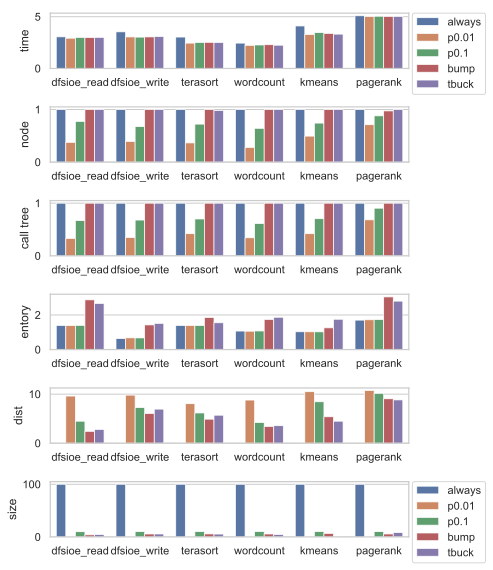

In [8]:
sns.set(style="whitegrid",color_codes=True)
fig, axes = plt.subplots(6,1,figsize = (7, 8))
# time
time_plt = sns.barplot(x=btime.bench, y=btime.time, hue=btime.sampler, ax=axes[0], linewidth=0.7)
time_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
time_plt.set(xlabel='',ylabel='time')

# node
node_plt = sns.barplot(x=bnode.bench, y=bnode.node, hue=bnode.sampler, ax=axes[1], linewidth=0.7)
node_plt.legend().remove()  
node_plt.set(xlabel='',ylabel='node')
# tree
tree_plt = sns.barplot(x=btree.bench, y=btree.tree, hue=btree.sampler, ax=axes[2], linewidth=0.7)
tree_plt.legend().remove()  
tree_plt.set(xlabel='',ylabel='call tree')
# 信息熵
en_plt = sns.barplot(x=ben.bench, y=ben.en, hue=ben.sampler, ax=axes[3], linewidth=0.7)
en_plt.legend().remove() 
en_plt.set(xlabel='',ylabel='entory')
# 相似度
dist_plt = sns.barplot(x=bdist.bench, y=bdist.dist, hue=bdist.sampler, ax=axes[4], linewidth=0.7)
dist_plt.legend().remove() 
dist_plt.set(xlabel='',ylabel='dist')

# size
size_plt = sns.barplot(x=bsize.bench, y=bsize.filesize, hue=bsize.sampler, ax=axes[5], linewidth=0.7)
size_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
size_plt.set(xlabel='',ylabel='size')

plt.tight_layout()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


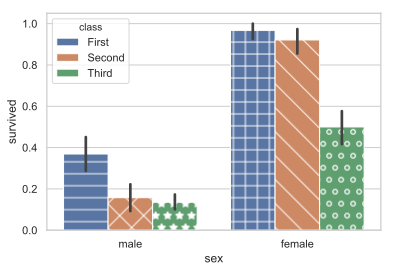

In [12]:
titanic = sns.load_dataset("titanic")

# Make the barplot
bar = sns.barplot(x="sex", y="survived", hue="class", data=titanic);

# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

plt.show()

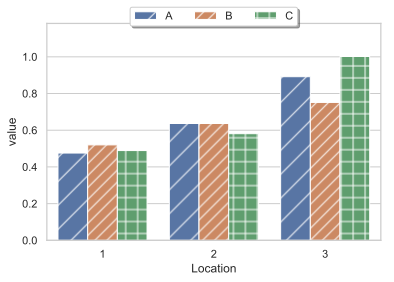

In [17]:
import itertools
data1 = pd.DataFrame(np.random.rand(17, 3), columns=['A', 'B', 'C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17, 3) + 0.2, columns=['A', 'B', 'C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17, 3) + 0.4, columns=['A', 'B', 'C']).assign(Location=3)
cdf = pd.concat([data1, data2, data3])
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
ax = sns.barplot(x="Location", y="value", hue="Letter", data=mdf, errwidth=0)

num_locations = len(mdf.Location.unique())
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(ax.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

plt.show()

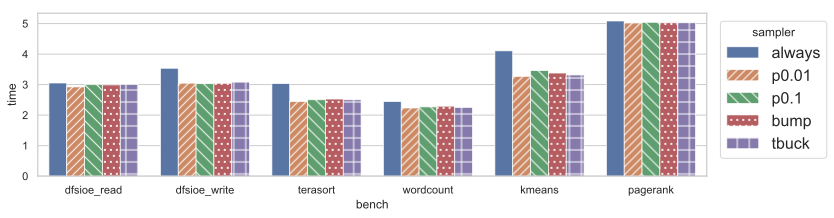

In [51]:
fig, axes = plt.subplots(figsize = (12, 3))
# time
hatches = itertools.cycle(['','///', '\\\\', '..', '+'])
time_plt = sns.barplot(x=btime.bench, y=btime.time, hue=btime.sampler,linewidth=0.7)
time_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
for i, bar in enumerate(time_plt.patches):
    if i % 6 == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
#     print(i, hatch)
legend = axes.legend(loc='upper center', bbox_to_anchor=(1.1,1.0),prop={'size': 16}, title='sampler')

In [34]:
legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(9)

AttributeError: 'Rectangle' object has no attribute '_legmarker'

In [20]:
a?

Type:           Rectangle
String form:    Rectangle(xy=(-0, -0), width=22, height=7.7, angle=0)
File:           /usr/local/lib/python3.7/site-packages/matplotlib/patches.py
Docstring:     
Draw a rectangle with lower left at *xy* = (*x*, *y*) with
specified *width*, *height* and rotation *angle*.
Init docstring:
Parameters
----------
xy : (float, float)
    The bottom and left rectangle coordinates
width : float
    Rectangle width
height : float
    Rectangle height
angle : float, optional
  rotation in degrees anti-clockwise about *xy* (default is 0.0)
fill : bool, optional
    Whether to fill the rectangle (default is ``True``)

Notes
-----
Valid kwargs are:
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float or None
  animated: bool
  antialiased: unknown
  capstyle: {'butt', 'round', 'projecting'}
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | Non